In [1]:
from PIL import Image
import matplotlib.pyplot as plt

import numpy as np
import cv2

%matplotlib inline

(-0.5, 3455.5, 4607.5, -0.5)

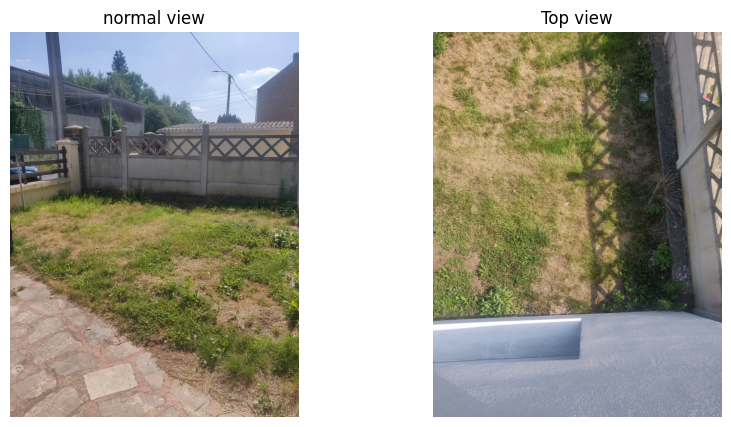

In [2]:
normal_view = Image.open('../../data/IMG_20250711_163748.jpg')
normal_view = normal_view.rotate(-90, expand=True)

top_image_view = Image.open('../../data/IMG_20250711_163552.jpg')
top_image_view = top_image_view.rotate(-90, expand=True)

# Create side-by-side plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view)
plt.title("normal view")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view)
plt.title("Top view")
plt.axis('off')

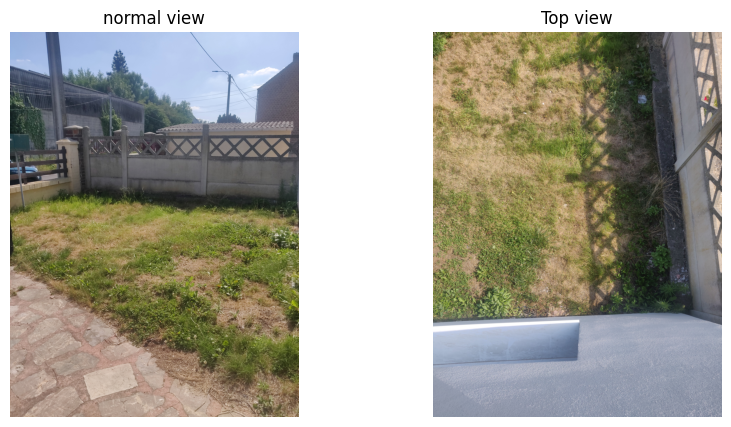

In [3]:
normal_view_2 = Image.open('../../data/IMG_20250711_163748.jpg')
normal_view_2 = normal_view_2.rotate(-90, expand=True)

top_image_view_2 = Image.open('../../data/IMG_20250711_163553.jpg')
top_image_view_2 = top_image_view_2.rotate(-90, expand=True)

# Create side-by-side plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view_2)
plt.title("normal view")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view_2)
plt.title("Top view")
plt.axis('off')
plt.show()

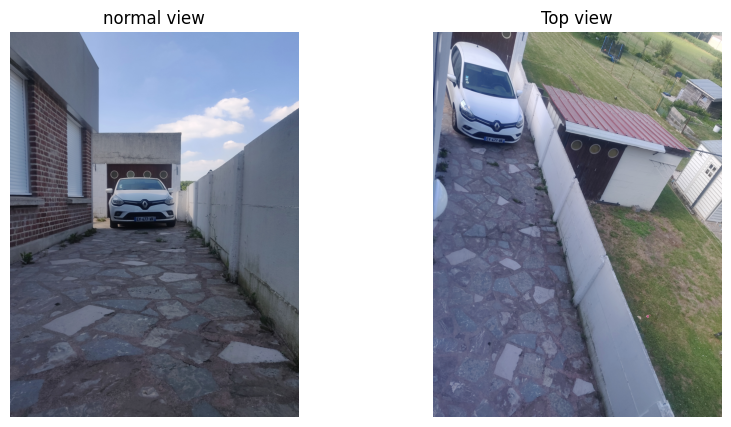

In [4]:
normal_view_3 = Image.open('../../data/IMG_20250711_163734.jpg')
normal_view_3 = normal_view_3.rotate(-90, expand=True)

top_image_view_3 = Image.open('../../data/IMG_20250711_163700.jpg')
top_image_view_3 = top_image_view_3.rotate(-90, expand=True)

# Create side-by-side plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view_3)
plt.title("normal view")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view_3)
plt.title("Top view")
plt.axis('off')
plt.show()

In [5]:
MIN_MATCH_COUNT = 10

# Initialize sift detector
sift = cv2.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(np.array(normal_view_3), None)
kp2, des2 = sift.detectAndCompute(np.array(top_image_view_3), None)

print(f"matches' Type : {type(kp1)}")
if isinstance(kp1, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(kp1)}")
    print(f"Number of keypoints in top view: {len(kp2)}")

elif isinstance(kp1, np.ndarray):
    print(f"Number of keypoints in normal view: {kp1.shape[0]}")
    print(f"Number of keypoints in top view: {kp2.shape[0]}")

if isinstance(des1, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(des1)}")
elif isinstance(des1, np.ndarray):
    print(f"Number of keypoints in normal view: {des1.shape}")
    print(f"Number of keypoints in top view: {des2.shape}")

matches' Type : <class 'tuple'>
Number of keypoints in normal view: 6585
Number of keypoints in top view: 28138
Number of keypoints in normal view: (6585, 128)
Number of keypoints in top view: (28138, 128)


In [6]:
# Initialize sift detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1_orb, des1_orb = orb.detectAndCompute(np.array(normal_view_3), None)
kp2_orb, des2_orb = orb.detectAndCompute(np.array(top_image_view_3), None)

print(f"matches' Type : {type(kp1_orb)}")
if isinstance(kp1_orb, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(kp1_orb)}")
    print(f"Number of keypoints in top view: {len(kp2_orb)}")

elif isinstance(kp1_orb, np.ndarray):
    print(f"Number of keypoints in normal view: kp1_orb shape : {kp1_orb.shape}")
    print(f"Number of keypoints in top view: kp1_orb shape : {kp2_orb.shape}")

if isinstance(des1_orb, (list, tuple)):
    print(f"Number of keypoints in normal view: {len(des1_orb)}")
elif isinstance(des1_orb, np.ndarray):
    print(f"des1_orb descripeur shape: {des1_orb.shape}")
    print(f"des2_orb descripeur shape: {des2_orb.shape}")

matches' Type : <class 'tuple'>
Number of keypoints in normal view: 500
Number of keypoints in top view: 500
des1_orb descripeur shape: (500, 32)
des2_orb descripeur shape: (500, 32)


In [7]:
print( des1_orb.shape, des2_orb.shape )

(500, 32) (500, 32)


In [8]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1  
index_params  = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks = 50)  # or pass empty dictionary
print(f"SEARCH PARMS: {search_params}")

flann = cv2.FlannBasedMatcher(index_params, search_params)  
matches = flann.knnMatch(des1, des2, k=2)

if isinstance( matches, (list, tuple) ):
    print(f"number of matches found as tuple or list: {len(matches)}")
elif isinstance(matches, np.ndarray):
    print(f"number of matches found: {matches.shape}")

SEARCH PARMS: {'checks': 50}
number of matches found as tuple or list: 6585


In [9]:
# FLANN parameters
FLANN_INDEX_KDTREE = 1  
index_params  = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks = 50)  # or pass empty dictionary
print(f"SEARCH PARMS: {search_params}")

flann = cv2.FlannBasedMatcher(index_params, search_params)  
matches_orb = flann.knnMatch(des1, des2, k=2)

if isinstance( matches_orb, (list, tuple) ):
    print(f"number of matches found as tuple or list: {len(matches_orb)}")
elif isinstance(matches_orb, np.ndarray):
    print(f"number of matches found: {matches_orb.shape}")

SEARCH PARMS: {'checks': 50}
number of matches found as tuple or list: 6585


In [10]:
# store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

print(f"Number of good matches : {len(good_matches)}")

Number of good matches : 106


In [11]:
if len(good_matches) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # Find homography
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    print(f"Homography matrix: \n{M}")

    h, w = normal_view_3.size
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)
else:
    print( "Not enough matches are found {}/{}".format( len(good_matches), MIN_MATCH_COUNT) ) 
    matchesMask = None
    dst = None

Homography matrix: 
[[ 6.25674143e+00  3.71198872e-01 -6.07356260e+03]
 [ 1.53057392e+00  7.66975362e+00 -1.10888190e+04]
 [ 6.00175600e-04  1.98906764e-03  1.00000000e+00]]


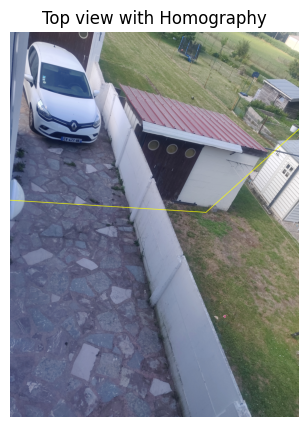

In [12]:
top_image_view_poly = cv2.polylines(np.array(top_image_view_3), [np.int32(dst)], True, (255, 255, 0), 5, cv2.LINE_AA)
plt.figure(figsize=(10, 5))
plt.imshow(top_image_view_poly)
plt.title("Top view with Homography")
plt.axis('off')
plt.show()

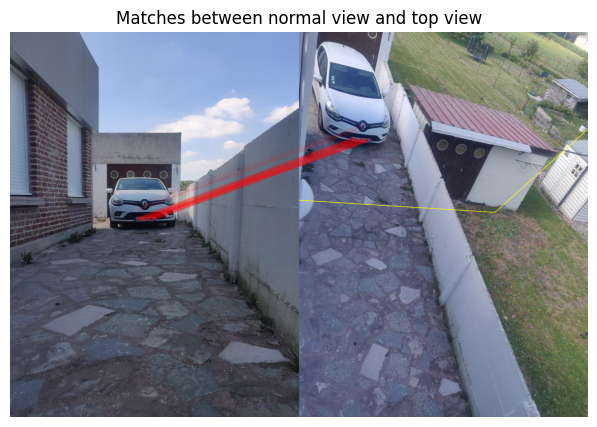

In [13]:
draw_params = dict(matchColor=(255, 0, 0), 
                   singlePointColor=None, 
                   matchesMask=matchesMask, 
                   flags=0)

image_draw = cv2.drawMatches(np.array(normal_view_3), kp1, np.array(top_image_view_poly), kp2, good_matches, None, **draw_params)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()  

In [14]:
print(type(np.array(normal_view_3)))

print(f"Type of top_image_view_3: {type( top_image_view_poly)}")

print(f"Type of top_image_view_3: {type(kp1)}")

print(f"Type of good_matches: {type( good_matches)}")

print(f"matches len {len(good_matches)}")

<class 'numpy.ndarray'>
Type of top_image_view_3: <class 'numpy.ndarray'>
Type of top_image_view_3: <class 'tuple'>
Type of good_matches: <class 'list'>
matches len 106


In [15]:
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
    else:
        matchesMask[i] = [0, 0]     

draw_params_knn = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask,
                     flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS #0
                    )

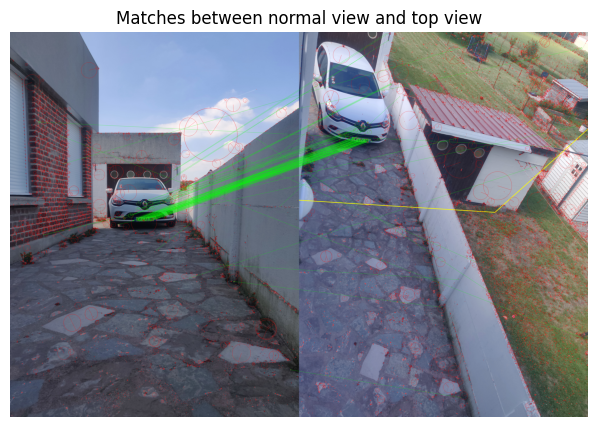

In [16]:
#img3 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)
#cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS DrawMatchesFlags_DEFAULT
image_draw3 = cv2.drawMatchesKnn(np.array(normal_view_3), list(kp1), top_image_view_poly, list(kp2), matches, None, **draw_params_knn)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw3)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()

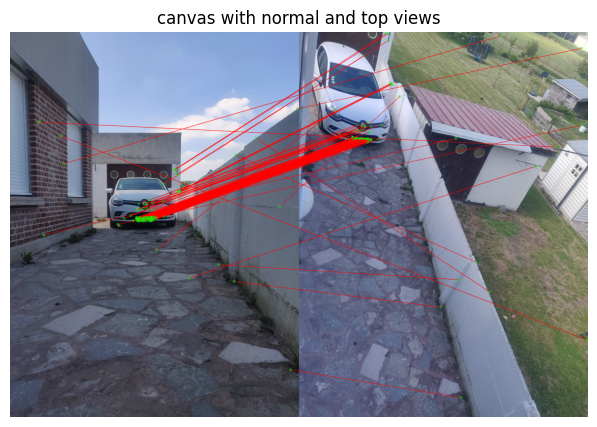

In [17]:
def draw_matches(image1, kp1, image2, kp2, good_matches, mask=None):
    """
    Draws matches between two images.
    
    Parameters:
    - image1: First image.
    - kp1: Keypoints in the first image.
    - image2: Second image.
    - kp2: Keypoints in the second image.
    - matches: Matches between the keypoints.
    - mask: Optional mask to filter matches.
    
    Returns:
    - Image with matches drawn.
    """
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]


    canvas = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    canvas[:h1, :w1] = np.array(image1)
    canvas[:h2, w1:w1 + w2] = np.array(image2)

    for m in good_matches:
        #m = m[0]  # unwrap match from list
        pt1 = tuple(np.round(kp1[m.queryIdx].pt).astype(int))
        pt2 = tuple(np.round(kp2[m.trainIdx].pt).astype(int))
        pt2 = (pt2[0] + w1, pt2[1])      # Shift second point for canvas

        # Draw thick lines and circles
        cv2.line(canvas, pt1, pt2, (255, 0, 0), thickness=3)  # Line
        cv2.circle(canvas, pt1, radius=12, color=(0, 255, 0), thickness=4)  # Filled circle
        cv2.circle(canvas, pt2, radius=12, color=(0, 255, 0), thickness=4)


    return canvas

canvas = draw_matches(np.array(normal_view_3), kp1, np.array(top_image_view_3), kp2, good_matches, mask=matchesMask)

plt.figure(figsize=(10, 5))
plt.imshow(canvas)
plt.title("canvas with normal and top views")
plt.axis('off')
plt.show()

In [18]:
normal_view_3_array = np.array(normal_view_3)
top_image_view_3_array = np.array(top_image_view_3)

print(f"Normal_view_3_array shape: {normal_view_3_array.shape}")
print(f"To_image_view_3_array: {top_image_view_3_array.shape}")

Normal_view_3_array shape: (4352, 3264, 3)
To_image_view_3_array: (4352, 3264, 3)


In [19]:
h1, w1 = normal_view_3_array.shape[:2]
h2, w2 = top_image_view_3_array.shape[:2]
canvas = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)

canvas[:h1, :w1] = cv2.cvtColor(normal_view_3_array) #, cv2.COLOR_GRAY2BGR

canvas[:h2, w1:w1 + w2] = cv2.cvtColor( top_image_view_3_array) #, cv2.COLOR_GRAY2BGR

error: OpenCV(4.11.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)


In [20]:
print(h1, w1)

canvas[:h1, :w1].shape

4352 3264


(4352, 3264, 3)

In [21]:
# find the keypoints and descriptors with SIFT
kp1_2, des1_2 = sift.detectAndCompute(np.array(normal_view), None)
kp2_2, des2_2 = sift.detectAndCompute(np.array(top_image_view), None)

print(f"Number of keypoints in normal view: {len(kp1_2)}")
print(f"Number of keypoints in top view: {len(kp2_2)}")

print(f"Number of keypoints in normal view: {des1_2.shape}")
print(f"Number of keypoints in top view: {des2_2.shape}")

Number of keypoints in normal view: 126086
Number of keypoints in top view: 211917
Number of keypoints in normal view: (126086, 128)
Number of keypoints in top view: (211917, 128)


In [22]:
# FLANN parameters
FLANN_INDEX_KDTREE_2 = 2  
index_params_2  = dict(algorithm=FLANN_INDEX_KDTREE_2, trees=5)
search_params_2 = dict(checks = 50)  # or pass empty dictionary
print(f"SEARCH PARMS: {search_params_2}")

flann_2 = cv2.FlannBasedMatcher(index_params_2, search_params_2)  
matches_2 = flann.knnMatch(des1_2, des2_2, k=2)

if isinstance( matches_2, (list, tuple) ):
    print(f"number of matches found as tuple or list: {len(matches_2)}")
elif isinstance(matches_2, np.ndarray):
    print(f"number of matches found: {matches_2.shape}")

SEARCH PARMS: {'checks': 50}
number of matches found as tuple or list: 126086


Number of good matches : 96
Homography matrix: 
[[-3.73395760e-01 -2.57705165e-01  1.76501869e+03]
 [-7.37585974e-01 -4.90249847e-01  3.42371042e+03]
 [-2.15401422e-04 -1.42894713e-04  1.00000000e+00]]


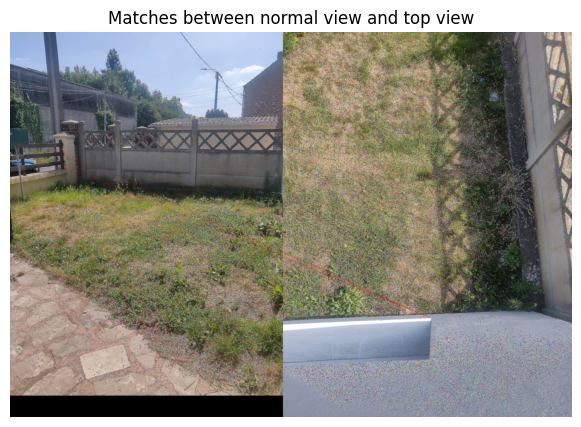

In [23]:
# store all the good matches as per Lowe's ratio test
good_matches_2 = []
for m, n in matches_2:
    if m.distance < 0.7 * n.distance:
        good_matches_2.append(m)

print(f"Number of good matches : {len(good_matches_2)}")
if len(good_matches_2) > MIN_MATCH_COUNT:
    src_pts_2 = np.float32([kp1_2[m.queryIdx].pt for m in good_matches_2]).reshape(-1, 1, 2)
    dst_pts_2 = np.float32([kp2_2[m.trainIdx].pt for m in good_matches_2]).reshape(-1, 1, 2)

    # Find homography
    M_2, mask_2 = cv2.findHomography(src_pts_2, dst_pts_2, cv2.RANSAC, 5.0)
    matchesMask_2 = mask_2.ravel().tolist()

    print(f"Homography matrix: \n{M_2}")

    h, w = normal_view.size
    pts_2 = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst_2 = cv2.perspectiveTransform(pts_2, M_2)

draw_params_2 = dict(matchColor=(255, 0, 0), 
                   singlePointColor=None, 
                   matchesMask=matchesMask_2, 
                   flags=0) #drawMatchesKnn

image_draw_2 = cv2.drawMatches(np.array(normal_view), kp1_2, np.array(top_image_view), kp2_2, good_matches_2, None, **draw_params_2)
#image_draw_2 = cv2.drawMatchesKnn(np.array(normal_view), kp1_2, np.array(top_image_view), kp2_2, good_matches_2, None, **draw_params_2)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw_2)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()  

In [24]:
# Need to draw only good matches, so create a mask
matchesMask_2_knn = [[0, 0] for i in range(len(matches_2))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches_2):
    if m.distance < 0.9 * n.distance:
        matchesMask_2_knn[i] = [1, 0]
    else:
        matchesMask_2_knn[i] = [0, 0]     

draw_params_knn_2 = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask_2_knn,
                     flags = cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS #0
                    )

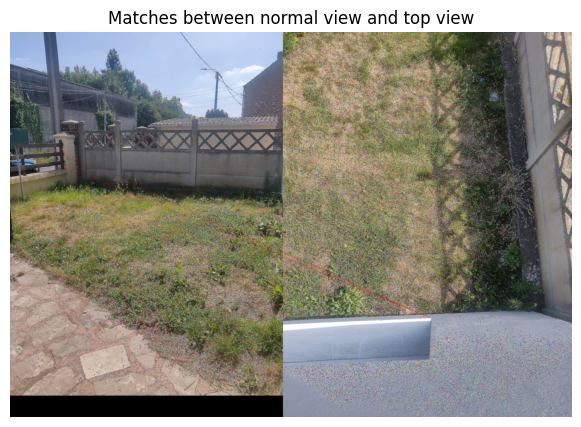

In [25]:
image_draw_2_knn = cv2.drawMatchesKnn(np.array(normal_view), kp1_2, np.array(top_image_view), kp2_2, matches_2, None, **draw_params_knn_2)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw_2)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show() 

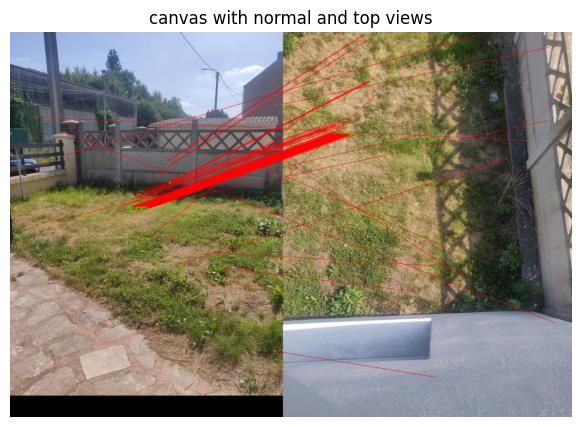

In [26]:
def draw_matches(image1, kp1, image2, kp2, good_matches, mask=None):
    """
    Draws matches between two images.
    
    Parameters:
    - image1: First image.
    - kp1: Keypoints in the first image.
    - image2: Second image.
    - kp2: Keypoints in the second image.
    - matches: Matches between the keypoints.
    - mask: Optional mask to filter matches.
    
    Returns:
    - Image with matches drawn.
    """
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]


    canvas = np.zeros((max(h1, h2), w1 + w2, 3), dtype=np.uint8)
    canvas[:h1, :w1] = np.array(image1)
    canvas[:h2, w1:w1 + w2] = np.array(image2)

    for m in good_matches:
        #m = m[0]  # unwrap match from list
        pt1 = tuple(np.round(kp1[m.queryIdx].pt).astype(int))
        pt2 = tuple(np.round(kp2[m.trainIdx].pt).astype(int))
        pt2 = (pt2[0] + w1, pt2[1])      # Shift second point for canvas

        # Draw thick lines and circles
        cv2.line(canvas, pt1, pt2, (255, 0, 0), thickness=3)  # Line
        cv2.circle(canvas, pt1, radius=6, color=(0, 255, 0), thickness=-1)  # Filled circle
        cv2.circle(canvas, pt2, radius=6, color=(0, 255, 0), thickness=-1)


    return canvas

canvas = draw_matches(np.array(normal_view), kp1, np.array(top_image_view), kp2, good_matches, mask=matchesMask)
plt.figure(figsize=(10, 5))
plt.imshow(canvas)
plt.title("canvas with normal and top views")
plt.axis('off')
plt.show()

In [48]:
good_matches_2[:2]  # Display first two matches for verification

[< cv2.DMatch 0x750870e74f10>, < cv2.DMatch 0x750870e76510>]

In [27]:
#img3 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)
#cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS DrawMatchesFlags_DEFAULT
image_draw = cv2.drawMatchesKnn(np.array(normal_view), list(kp1_2), np.array(top_image_view), list(kp2_2), matches_2, None, **draw_params_knn)

plt.figure(figsize=(10, 5))
plt.imshow(image_draw3)
plt.title("Matches between normal view and top view")
plt.axis('off')
plt.show()

error: OpenCV(4.11.0) /io/opencv/modules/features2d/src/draw.cpp:258: error: (-201:Incorrect size of input array) matchesMask must have the same size as matches1to2 in function 'drawMatches'


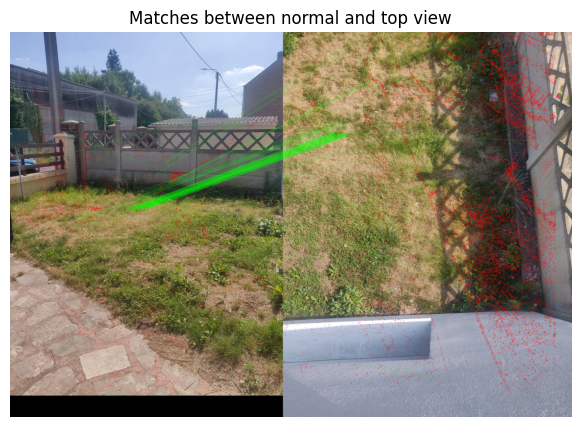

AttributeError: 'tuple' object has no attribute 'distance'

In [28]:
# Need to draw only good matches, so create a mask
matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]
    else:
        matchesMask[i] = [0, 0]     

draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)
img3 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)

plt.figure(figsize=(10, 5))
plt.imshow(img3)
plt.title("Matches between normal and top view")
plt.axis('off')
plt.show()      

# Find homography
if len(kp1) >= MIN_MATCH_COUNT and len(kp2) >= MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches if m.distance < 0.7 * n.distance]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches if m.distance < 0.7 * n.distance]).reshape(-1, 1, 2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
else:
    print("Not enough matches are found - {}/{}".format(len(kp1), len(kp2)))
    matchesMask = None  
draw_params = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask, flags=0)
img4 = cv2.drawMatchesKnn(np.array(normal_view), kp1, np.array(top_image_view), kp2, matches, None, **draw_params)
plt.figure(figsize=(10, 5))
plt.imshow(img4)
plt.title("Matches with Homography")
plt.axis('off')
plt.show()  
# Apply homography to top view
if M is not None:
    h, w = np.array(normal_view).shape[:2]
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    top_image_warped = cv2.polylines(np.array(top_image_view), [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(top_image_warped)
    plt.title("Warped Top View")
    plt.axis('off')
    plt.show()
# Apply homography to normal view
if M is not None:       
    h, w = np.array(top_image_view).shape[:2]
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv2.perspectiveTransform(pts, M)

    normal_view_warped = cv2.polylines(np.array(normal_view), [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(normal_view_warped)
    plt.title("Warped Normal View")
    plt.axis('off')
    plt.show()  
    

In [29]:
import json
import src.config.config as config

print(f"Config points correspondance file: {config.points_correspondance_file}")

with open(config.points_correspondance_file, 'r') as file:
    points_correspondance = json.load(file)

print(f"Points correspondance: {points_correspondance}")

Config points correspondance file: /home/besttic-rd/Documents/besttic/parkOccupancy/src/config/../../data/parking_points_correspondance.json
Points correspondance: {'0': [[377, 3338], [696, 3866]], '1': [[666, 3443], [878, 3942]], '2': [[1177, 3162], [1009, 3583]], '3': [[896, 3082], [852, 3524]], '4': [[1466, 3526], [1237, 3988]], '5': [[1646, 3342], [1258, 3786]], '6': [[2400, 3535], [1591, 3950]], '7': [[2136, 3744], [1520, 4128]], '8': [[3159, 3706], [1832, 4056]], '9': [[1680, 2777], [1127, 2984]], '10': [[2120, 2743], [1372, 2912]], '11': [[2082, 3099], [1414, 3503]], '12': [[2748, 3166], [1710, 3571]], '13': [[2509, 2823], [1587, 3115]], '14': [[2212, 2412], [1355, 2161]], '15': [[2078, 2240], [1194, 1528]], '16': [[2011, 2161], [1080, 1118]], '17': [[1261, 2253], [422, 1329]], '18': [[946, 2341], [236, 1705]], '19': [[1076, 2366], [405, 1802]], '20': [[1424, 2391], [722, 1941]], '21': [[1826, 2282], [988, 1574]], '22': [[1567, 2270], [747, 1515]], '23': [[1655, 2471], [966, 224

In [30]:
with open("/home/besttic-rd/Documents/besttic/parkOccupancy/data/parking_points_correspondance.json", 'r') as file:
    points_correspondance_data = json.load(file)

print(points_correspondance_data)

{'0': [[377, 3338], [696, 3866]], '1': [[666, 3443], [878, 3942]], '2': [[1177, 3162], [1009, 3583]], '3': [[896, 3082], [852, 3524]], '4': [[1466, 3526], [1237, 3988]], '5': [[1646, 3342], [1258, 3786]], '6': [[2400, 3535], [1591, 3950]], '7': [[2136, 3744], [1520, 4128]], '8': [[3159, 3706], [1832, 4056]], '9': [[1680, 2777], [1127, 2984]], '10': [[2120, 2743], [1372, 2912]], '11': [[2082, 3099], [1414, 3503]], '12': [[2748, 3166], [1710, 3571]], '13': [[2509, 2823], [1587, 3115]], '14': [[2212, 2412], [1355, 2161]], '15': [[2078, 2240], [1194, 1528]], '16': [[2011, 2161], [1080, 1118]], '17': [[1261, 2253], [422, 1329]], '18': [[946, 2341], [236, 1705]], '19': [[1076, 2366], [405, 1802]], '20': [[1424, 2391], [722, 1941]], '21': [[1826, 2282], [988, 1574]], '22': [[1567, 2270], [747, 1515]], '23': [[1655, 2471], [966, 2249]], '24': [[1567, 2622], [1000, 2659]], '25': [[1219, 2609], [738, 2591]], '26': [[452, 2596], [130, 2536]], '27': [[892, 2588], [485, 2511]], '28': [[590, 2802], 

In [41]:
normal_view_points_correspondance = [value[0] for _, value in points_correspondance_data.items()]
bird_view_points_correspondance   = [value[1] for _, value in points_correspondance_data.items()]

normal_view_array = np.array(normal_view_points_correspondance)
bird_view_points_array = np.array(bird_view_points_correspondance)

print(f"Normal view array shape: {normal_view_array.shape}")
normal_view_array.shape

Normal view array shape: (33, 2)


(33, 2)

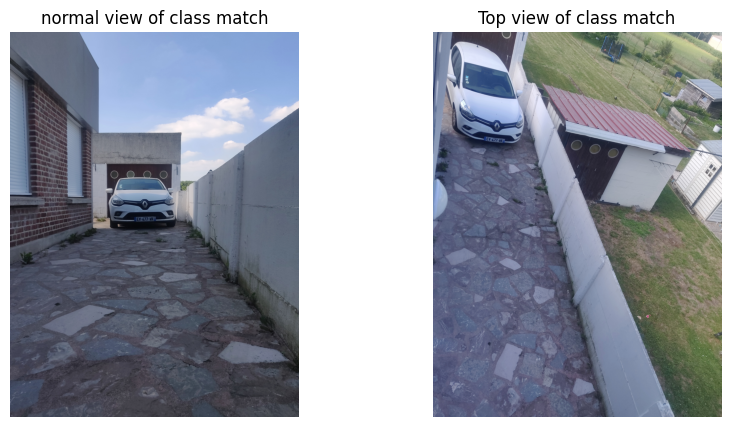

In [76]:
normal_view = Image.open("/home/besttic-rd/Documents/besttic/parkOccupancy/data/IMG_20250711_163734.jpg")
normal_view = normal_view.rotate(-90, expand=True)

top_image_view = Image.open("/home/besttic-rd/Documents/besttic/parkOccupancy/data/IMG_20250711_163700.jpg")
top_image_view = top_image_view.rotate(-90, expand=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view)
plt.title("normal view of class match")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view)
plt.title("Top view of class match")
plt.axis('off')
plt.show()

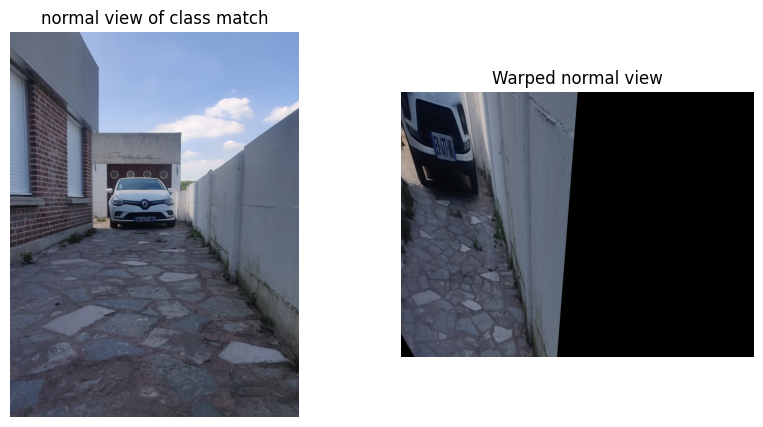

In [ ]:
def fit_homography(world_pts, img_pts, method='svd'):
        # coordinates: numpy array [[x,y], [x,y]...]
        # pixels: numpy array [[u,v,1], [u,v,1]...]

        if method == 'linear' :
            world_pts_array = np.pad(world_pts, [(0,0), (0,1)], mode='constant', constant_values=1)
            img_pts_array   = np.pad(img_pts, [(0,0), (0,1)], mode='constant', constant_values=1)

        A = []
        for i in range( world_pts_array.shape[0] ):
            # construct the linear system Ax = 0
            # where A is a 2n x 9 matrix and x is the vector of homography parameters
            # A.append([-x, -y, -1, 0, 0, 0, xp*x, xp*y, xp])
            # A.append([0, 0, 0, -x, -y, -1, yp*x, yp*y, yp])
            A.append( [*-world_pts_array[i, :], 0, 0, 0, *img_pts_array[i, 0]*world_pts_array[i, :] ] )
            A.append( [0, 0, 0, *-world_pts_array[i, :], *img_pts_array[i, 1]*world_pts_array[i, :]] )

        if method == "svd" :
            for (x, y), (xp, yp) in zip(world_pts, img_pts):
                A.append([-x, -y, -1, 0, 0, 0, xp*x, xp*y, xp])
                A.append([0, 0, 0, -x, -y, -1, yp*x, yp*y, yp])

            A = np.array(A)
            # solve homogenous least squares Ah = 0, when ||h|| = 1
            # solution is the eigenvector corresponding to minimum eigenvalue
            U, S, Vt = np.linalg.svd(A)
            h = Vt[-1, :] / Vt[-1, -1] # Normalize so that h[8] = 1

        if method == 'linear':
            for i in range( world_pts_array.shape[0] ):
                A.append( [*-world_pts_array[i, :], 0, 0, 0, *img_pts_array[i, 0]*world_pts_array[i, :] ] )
                A.append( [0, 0, 0, *-world_pts_array[i, :],  *img_pts_array[i, 1]*world_pts_array[i, :]] )
             
            A = np.array(A)
            print(f"A shape: {A.shape}")
            # solve homogenous least squares Ah = 0, when ||h|| = 1
            # solution is the eigenvector corresponding to minimum eigenvalue
            ATA = np.dot(A.T, A)
            eigenvalues, eigenvectors = np.linalg.eig(ATA)  
            h = eigenvectors[:, np.argmin(eigenvalues)].real
            
            # Solve for h using least squares
            #h, _, _, _ = np.linalg.lstsq(A, np.zeros(A.shape[0]), rcond=None)
            #h = h / h[-1]   # Normalize so that h[8] = 1
            #h = h / np.linalg.norm(h)  # Normalize to unit length     
            # Reshape h to 3x3 matrix

        H = h.reshape((3, 3))
        return H

H = fit_homography(normal_view_points_correspondance , bird_view_points_correspondance, method = "svd" )

height, width = normal_view.size
warped_image = cv2.warpPerspective(
    np.array(normal_view), H, (width, height)
)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view)
plt.title("normal view of class match")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warped_image)
plt.title("Warped normal view")
plt.axis('off')
plt.show()

A shape: (66, 9)
H cv2: 
[[-7.12889337e-01 -1.17349070e+00  3.25727445e+03]
 [-2.82330405e-01 -4.10487728e+00  8.70821529e+03]
 [-9.00129703e-05 -6.85829659e-04  1.00000000e+00]]
H_svd: 
[[-7.12889337e-01 -1.17349070e+00  3.25727445e+03]
 [-2.82330405e-01 -4.10487728e+00  8.70821529e+03]
 [-9.00129703e-05 -6.85829659e-04  1.00000000e+00]]
H_linear: 
[[ 7.66755688e-01  1.26217805e+00 -3.50344518e+03]
 [ 3.03656862e-01  4.41504811e+00 -9.36620782e+03]
 [ 9.68125497e-05  7.37653517e-04 -1.07556205e+00]]


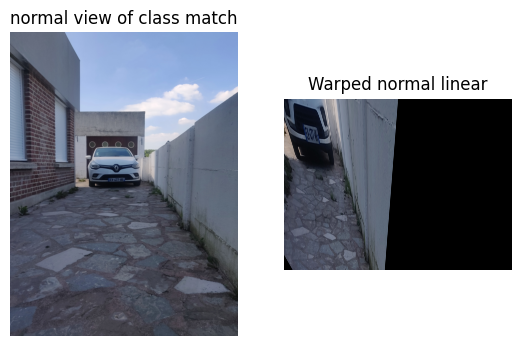

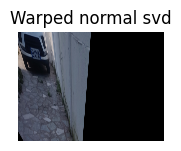

In [96]:
#normal_view_array, bird_view_points_array 
H_linear = fit_homography( normal_view_array, bird_view_points_array , method = "linear" )
H_svd    = fit_homography( normal_view_array, bird_view_points_array , method = "svd" )

print(f"H cv2: \n{H}")
print(f"H_svd: \n{H_svd}")
print(f"H_linear: \n{10000*H_linear}")
height, width = normal_view.size
warped_image_linear = cv2.warpPerspective(
    np.array(normal_view), H_linear, (width, height)
)  

warped_image_svd = cv2.warpPerspective(
    np.array(normal_view), H_svd, (width, height)
)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)

plt.subplot(1, 3, 1)
plt.imshow(normal_view)
plt.title("normal view of class match")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(warped_image_linear)
plt.title("Warped normal linear")
plt.axis('off')
plt.show()

plt.subplot(1, 3, 3)
plt.imshow(warped_image_svd)
plt.title("Warped normal svd")
plt.axis('off')
plt.show()

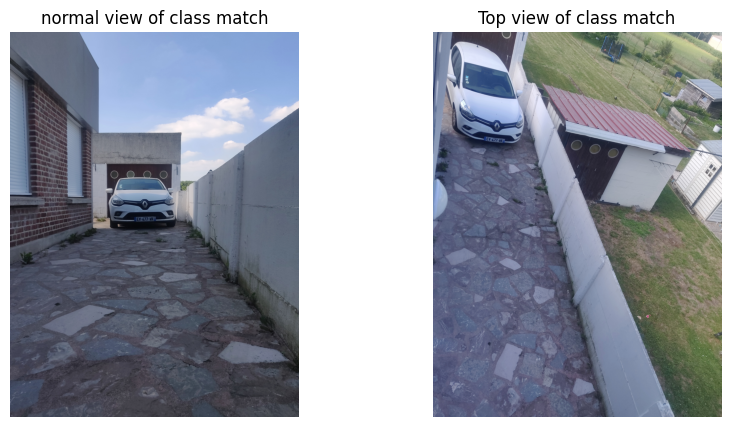

In [89]:
normal_view = Image.open("/home/besttic-rd/Documents/besttic/parkOccupancy/data/IMG_20250711_163734.jpg")
normal_view = normal_view.rotate(-90, expand=True)

top_image_view = Image.open("/home/besttic-rd/Documents/besttic/parkOccupancy/data/IMG_20250711_163700.jpg")
top_image_view = top_image_view.rotate(-90, expand=True)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view)
plt.title("normal view of class match")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(top_image_view)
plt.title("Top view of class match")
plt.axis('off')
plt.show()

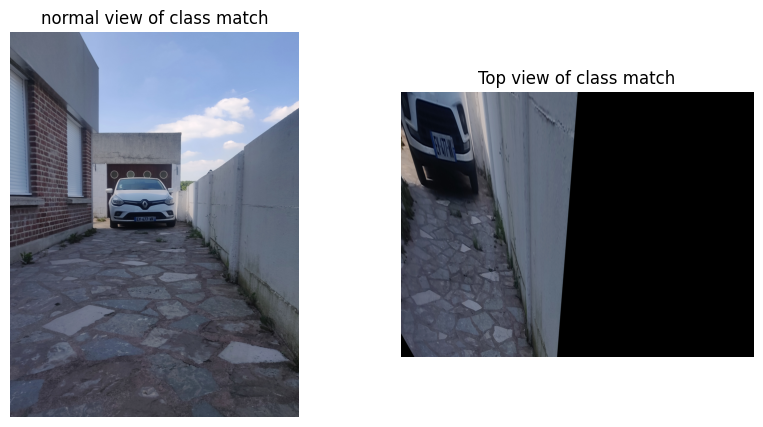

In [74]:
height, width = normal_view.size
warped_image = cv2.warpPerspective(
    np.array(normal_view), H, (width, height)
)  

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)

plt.subplot(1, 2, 1)
plt.imshow(normal_view)
plt.title("normal view of class match")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(warped_image)
plt.title("Top view of class match")
plt.axis('off')
plt.show()

In [35]:
values = list(points_correspondance_data.values())

camera_pts   = np.float32([pt[0] for pt in values]).reshape(-1, 1, 2)
bird_eye_pts = np.float32([pt[1] for pt in values]).reshape(-1, 1, 2)

print(f"Camera points shape: {camera_pts.shape}")
normal_view_array.shape

Camera points shape: (33, 1, 2)


(33, 2)

In [4]:
from datetime import datetime 
import time

start_time = int( time.time() )  # Record the start time

other_time = datetime.now()  # Record the current time

print(start_time, other_time)

1754472116 2025-08-06 11:21:56.803928


In [37]:
def test_arg(*args) :
    print(f"Arguments received: {args}")
    # Process the arguments as needed
    # For example, you can return them or perform some operations
    # Here, we just return the args for demonstration       

    arg_val = args[0] if args else None
    return args

arg_val = test_arg(1, 2, 3, "test")

arg_val

Arguments received: (1, 2, 3, 'test')


(1, 2, 3, 'test')

In [1]:
from torch import nn
from torchvision.models import resnet50
from torchvision.ops.misc import FrozenBatchNorm2d

model = resnet50(pretrained=True)
model.eval()




/home/besttic-rd/anaconda3/envs/tf_torch_gpu/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/besttic-rd/anaconda3/envs/tf_torch_gpu/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/besttic-rd/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 51.3MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
model.summary()

AttributeError: 'ResNet' object has no attribute 'summary'

In [3]:
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet')

resnet_model.summary()

2025-08-08 17:26:35.510594: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-08-08 17:26:35.511117: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       